# Final Project Phase II

## Step 1: Loading NFL Big Data Bowl Relevant Data

### Importing modules to be used throughout code

In [4]:
import pandas as pd
import glob
import os
import numpy as np

### Defining the correct file path to load in csv files

In [5]:
data_dir = "data/train"

if not os.path.exists(data_dir):
    raise FileNotFoundError(f"Folder not found: {os.path.abspath(data_dir)}")

print(f"Data directory found: {os.path.abspath(data_dir)}")

Data directory found: /Users/grantstarnes/Desktop/FinalProjectPhaseII/data/train


### Making sure all of the input/output files are correctly being located

In [6]:
# Find all weekly input and output CSVs
input_files = sorted(glob.glob(os.path.join(data_dir, "input_2023_w*.csv")))
output_files = sorted(glob.glob(os.path.join(data_dir, "output_2023_w*.csv")))

print(f"📂 Found {len(input_files)} input files and {len(output_files)} output files.")
print("\nFirst few input files:")
print(input_files[:3])
print("\nFirst few output files:")
print(output_files[:3])

📂 Found 18 input files and 18 output files.

First few input files:
['data/train/input_2023_w01.csv', 'data/train/input_2023_w02.csv', 'data/train/input_2023_w03.csv']

First few output files:
['data/train/output_2023_w01.csv', 'data/train/output_2023_w02.csv', 'data/train/output_2023_w03.csv']


In [7]:
# Load and combine all weeks for input and output
input_df = pd.concat((pd.read_csv(f) for f in input_files), ignore_index=True)
output_df = pd.concat((pd.read_csv(f) for f in output_files), ignore_index=True)

print("Data loaded successfully!")
print(f"Input shape: {input_df.shape}")
print(f"Output shape: {output_df.shape}")

Data loaded successfully!
Input shape: (4880579, 23)
Output shape: (562936, 6)


In [8]:
# Preview first few rows
display(input_df.head())
display(output_df.head())

# Quick info
print("\n--- Input DataFrame Info ---")
input_df.info()
print("\n--- Output DataFrame Info ---")
output_df.info()

,game_id,play_id,player_to_predict,nfl_id,frame_id,play_direction,absolute_yardline_number,player_name,player_height,player_weight,...,player_role,x,y,s,a,dir,o,num_frames_output,ball_land_x,ball_land_y
0,2023090700,101,False,54527,1,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.09,0.39,322.40,238.24,21,63.259998,-0.22
1,2023090700,101,False,54527,2,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.94,0.04,0.61,200.89,236.05,21,63.259998,-0.22
2,2023090700,101,False,54527,3,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.33,36.93,0.12,0.73,147.55,240.60,21,63.259998,-0.22
3,2023090700,101,False,54527,4,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.35,36.92,0.23,0.81,131.40,244.25,21,63.259998,-0.22
4,2023090700,101,False,54527,5,right,42,Bryan Cook,6-1,210,...,Defensive Coverage,52.37,36.90,0.35,0.82,123.26,244.25,21,63.259998,-0.22


,game_id,play_id,nfl_id,frame_id,x,y
0,2023090700,101,46137,1,56.22,17.28
1,2023090700,101,46137,2,56.63,16.88
2,2023090700,101,46137,3,57.06,16.46
3,2023090700,101,46137,4,57.48,16.02
4,2023090700,101,46137,5,57.91,15.56



--- Input DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880579 entries, 0 to 4880578
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   game_id                   int64  
 1   play_id                   int64  
 2   player_to_predict         bool   
 3   nfl_id                    int64  
 4   frame_id                  int64  
 5   play_direction            object 
 6   absolute_yardline_number  int64  
 7   player_name               object 
 8   player_height             object 
 9   player_weight             int64  
 10  player_birth_date         object 
 11  player_position           object 
 12  player_side               object 
 13  player_role               object 
 14  x                         float64
 15  y                         float64
 16  s                         float64
 17  a                         float64
 18  dir                       float64
 19  o                         float64

### Reading in the supplementary file that contains important data as well

In [9]:
supplementary = pd.read_csv("data/supplementary_data.csv")

/var/folders/wl/mr0t_6yx7bd85zhwy66s84hh0000gn/T/ipykernel_41239/1191419069.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supplementary = pd.read_csv("data/supplementary_data.csv")


In [10]:
supplementary.head()

,game_id,season,week,game_date,game_time_eastern,home_team_abbr,visitor_team_abbr,play_id,play_description,quarter,...,team_coverage_type,penalty_yards,pre_penalty_yards_gained,yards_gained,expected_points,expected_points_added,pre_snap_home_team_win_probability,pre_snap_visitor_team_win_probability,home_team_win_probability_added,visitor_team_win_probility_added
0,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,3461,(10:46) (Shotgun) J.Goff pass deep left to J.R...,4,...,COVER_2_ZONE,NaN,18,18,-0.664416,2.945847,0.834296,0.165704,-0.081149,0.081149
1,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,461,(7:30) J.Goff pass short right to J.Reynolds t...,1,...,COVER_6_ZONE,NaN,21,21,1.926131,1.345633,0.544618,0.455382,-0.029415,0.029415
2,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1940,(:09) (Shotgun) J.Goff pass incomplete deep ri...,2,...,COVER_2_ZONE,NaN,0,0,0.281891,-0.081964,0.771994,0.228006,0.000791,-0.000791
3,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1711,"(:45) (No Huddle, Shotgun) P.Mahomes pass deep...",2,...,COVER_2_ZONE,NaN,26,26,3.452352,2.342947,0.663187,0.336813,0.041843,-0.041843
4,2023090700,2023,1,09/07/2023,20:20:00,KC,DET,1588,(1:54) (Shotgun) P.Mahomes pass incomplete dee...,2,...,COVER_4_ZONE,NaN,0,0,1.921525,-0.324035,0.615035,0.384965,0.000061,-0.000061


In [11]:
supplementary.columns

Index(['game_id', 'season', 'week', 'game_date', 'game_time_eastern',
       'home_team_abbr', 'visitor_team_abbr', 'play_id', 'play_description',
       'quarter', 'game_clock', 'down', 'yards_to_go', 'possession_team',
       'defensive_team', 'yardline_side', 'yardline_number',
       'pre_snap_home_score', 'pre_snap_visitor_score',
       'play_nullified_by_penalty', 'pass_result', 'pass_length',
       'offense_formation', 'receiver_alignment', 'route_of_targeted_receiver',
       'play_action', 'dropback_type', 'dropback_distance',
       'pass_location_type', 'defenders_in_the_box', 'team_coverage_man_zone',
       'team_coverage_type', 'penalty_yards', 'pre_penalty_yards_gained',
       'yards_gained', 'expected_points', 'expected_points_added',
       'pre_snap_home_team_win_probability',
       'pre_snap_visitor_team_win_probability',
       'home_team_win_probability_added', 'visitor_team_win_probility_added'],
      dtype='object')

In [12]:
input_df = pd.read_csv("data/train/input_2023_w01.csv")
output_df = pd.read_csv("data/train/output_2023_w01.csv")
supplementary_df = pd.read_csv("data/supplementary_data.csv")

/var/folders/wl/mr0t_6yx7bd85zhwy66s84hh0000gn/T/ipykernel_41239/443153766.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supplementary_df = pd.read_csv("data/supplementary_data.csv")


## Preliminary Idea #1 for 2026 NFL Big Data Bowl: How quickly do defenders react while the ball is in the air?

In [16]:
receivers = (
    out_tagged.query("player_side == 'Offense' and player_role in ['Targeted Receiver', 'Other Route Runner']")
    .rename(columns={"nfl_id": "rec_nfl_id", "x": "rec_x", "y": "rec_y"})
    [["game_id", "play_id", "frame_id", "rec_nfl_id", "rec_x", "rec_y"]]
)

defenders = (
    out_tagged.query("player_side == 'Defense'")
    .rename(columns={"nfl_id": "def_nfl_id", "x": "def_x", "y": "def_y"})
    [["game_id", "play_id", "frame_id", "def_nfl_id", "def_x", "def_y"]]
)

In [17]:
receiver_defender_pairs = receivers.merge(
    defenders,
    on=["game_id", "play_id", "frame_id"],
    how="inner"
)

receiver_defender_pairs["distance"] = np.sqrt(
    (receiver_defender_pairs["rec_x"] - receiver_defender_pairs["def_x"])**2 +
    (receiver_defender_pairs["rec_y"] - receiver_defender_pairs["def_y"])**2
)

In [18]:
receiver_defender_pairs = (
    receiver_defender_pairs
    .sort_values(["game_id", "play_id", "def_nfl_id", "frame_id"])
    .assign(distance_change=lambda df: df.groupby(["game_id", "play_id", "def_nfl_id"])["distance"].diff(-1))
)

In [19]:
recovery_summary = (
    receiver_defender_pairs
    .groupby(["game_id", "play_id"])["distance_change"]
    .mean()
    .reset_index(name="avg_recovery_speed")
)

In [20]:
recovery_summary = recovery_summary.merge(
    supplementary[["game_id", "play_id", "pass_result", "team_coverage_man_zone"]],
    on=["game_id", "play_id"],
    how="left"
)

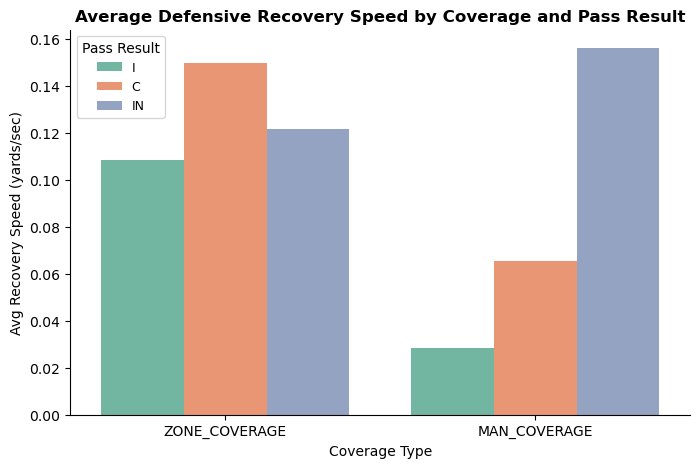

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
sns.barplot(
    data=recovery_summary,
    x="team_coverage_man_zone",
    y="avg_recovery_speed",
    hue="pass_result",
    palette="Set2",
    errorbar=None
)
plt.title("Average Defensive Recovery Speed by Coverage and Pass Result", fontsize=12, fontweight="bold")
plt.xlabel("Coverage Type")
plt.ylabel("Avg Recovery Speed (yards/sec)")
plt.legend(title="Pass Result", title_fontsize=10, fontsize=9)
sns.despine(top=True, right=True)
plt.show()

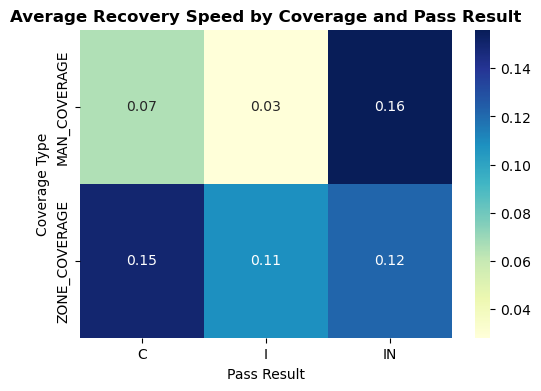

In [22]:
pivot = recovery_summary.pivot_table(
    index="team_coverage_man_zone",
    columns="pass_result",
    values="avg_recovery_speed"
)

plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Recovery Speed by Coverage and Pass Result", fontsize=12, fontweight="bold")
plt.xlabel("Pass Result")
plt.ylabel("Coverage Type")
plt.show()

## Preliminary Idea #2 for 2026 NFL Big Data Bowl: How does coverage success affect game outcomes?

In [14]:
player_roles = (
    input_df[["game_id", "play_id", "nfl_id", "player_side", "player_role", "player_name"]]
    .drop_duplicates()
)

In [15]:
out_tagged = output_df.merge(
    player_roles, on=["game_id", "play_id", "nfl_id"], how="left"
)

In [23]:
receiver_traj = (
    out_tagged.query("player_side == 'Offense' and player_role in ['Receiver', 'Targeted Receiver']")
    [["game_id", "play_id", "frame_id", "nfl_id", "x", "y"]]
    .rename(columns={"nfl_id": "rec_nfl_id", "x": "rec_x", "y": "rec_y"})
)

In [24]:
defenders_traj = (
    out_tagged.query("player_side == 'Defense'")
    [["game_id", "play_id", "frame_id", "nfl_id", "x", "y"]]
    .rename(columns={"nfl_id": "def_nfl_id", "x": "def_x", "y": "def_y"})
)

In [25]:
pairwise = receiver_traj.merge(
    defenders_traj, on=["game_id", "play_id", "frame_id"], how="left"
)
pairwise["dist_to_receiver"] = np.sqrt(
    (pairwise["def_x"] - pairwise["rec_x"]) ** 2 + (pairwise["def_y"] - pairwise["rec_y"]) ** 2
)

In [26]:
receiver_defender_pairs = (
    pairwise.sort_values("dist_to_receiver")
    .groupby(["game_id", "play_id", "frame_id", "rec_nfl_id"], as_index=False)
    .first()
)

In [27]:
game_teams = (
    supplementary[[
        "game_id", "play_id", "possession_team", "home_team_abbr",
        "visitor_team_abbr", "team_coverage_man_zone", "team_coverage_type"
    ]]
    .drop_duplicates()
)

In [28]:
player_roles = (
    input_df[[
        "game_id", "play_id", "nfl_id", "player_name", "player_position", "player_side", "player_role"
    ]]
    .drop_duplicates()
    .merge(game_teams, on=["game_id", "play_id"], how="left")
)

In [29]:
def infer_team(row):
    if row["player_side"] == "Offense":
        return row["possession_team"]
    elif row["player_side"] == "Defense":
        if row["possession_team"] == row["home_team_abbr"]:
            return row["visitor_team_abbr"]
        else:
            return row["home_team_abbr"]
    else:
        return np.nan

In [30]:
player_roles["team"] = player_roles.apply(infer_team, axis=1)

In [31]:
player_info = (
    player_roles[["game_id", "play_id", "nfl_id", "player_name", "player_position", "team"]]
    .drop_duplicates()
)

In [32]:
receiver_defender_pairs = (
    receiver_defender_pairs
    .merge(player_info, left_on=["game_id", "play_id", "rec_nfl_id"],
           right_on=["game_id", "play_id", "nfl_id"], how="left")
    .rename(columns={
        "player_name": "receiver_name",
        "player_position": "receiver_position",
        "team": "receiver_team"
    })
    .drop(columns="nfl_id")
)

In [33]:
receiver_defender_pairs = (
    receiver_defender_pairs
    .merge(player_info, left_on=["game_id", "play_id", "def_nfl_id"],
           right_on=["game_id", "play_id", "nfl_id"], how="left")
    .rename(columns={
        "player_name": "defender_name",
        "player_position": "defender_position",
        "team": "defender_team"
    })
    .drop(columns="nfl_id")
)

In [34]:
coverage_info = game_teams[["game_id", "play_id", "team_coverage_man_zone", "team_coverage_type"]].drop_duplicates()
receiver_defender_pairs = receiver_defender_pairs.merge(coverage_info, on=["game_id", "play_id"], how="left")

In [35]:
man_cov = receiver_defender_pairs[receiver_defender_pairs["team_coverage_man_zone"] == "MAN_COVERAGE"]
zone_cov = receiver_defender_pairs[receiver_defender_pairs["team_coverage_man_zone"] == "ZONE_COVERAGE"]

In [36]:
avg_man_separation = man_cov["dist_to_receiver"].mean(skipna=True)
std_man_separation = man_cov["dist_to_receiver"].std(skipna=True)

In [37]:
avg_zone_separation = zone_cov["dist_to_receiver"].mean(skipna=True)
std_zone_separation = zone_cov["dist_to_receiver"].std(skipna=True)

In [38]:
win_prob_info = supplementary[[
    "game_id", "play_id", "home_team_abbr", "visitor_team_abbr",
    "home_team_win_probability_added", "visitor_team_win_probility_added"
]].drop_duplicates()

In [39]:
receiver_defender_pairs = receiver_defender_pairs.merge(win_prob_info, on=["game_id", "play_id"], how="left")

In [40]:
pass_info = supplementary[["game_id", "play_id", "pass_result"]].drop_duplicates()
receiver_defender_pairs = receiver_defender_pairs.merge(pass_info, on=["game_id", "play_id"], how="left")

In [41]:
receiver_defender_pairs["good_coverage"] = np.where(
    (
        (receiver_defender_pairs["team_coverage_man_zone"] == "MAN_COVERAGE") &
        (receiver_defender_pairs["dist_to_receiver"] <= avg_man_separation)
    ) |
    (
        (receiver_defender_pairs["team_coverage_man_zone"] == "ZONE_COVERAGE") &
        (receiver_defender_pairs["dist_to_receiver"] <= avg_zone_separation)
    ),
    1, 0
)

In [42]:
receiver_defender_pairs.head()

,game_id,play_id,frame_id,rec_nfl_id,rec_x,rec_y,def_nfl_id,def_x,def_y,dist_to_receiver,...,defender_position,defender_team,team_coverage_man_zone,team_coverage_type,home_team_abbr,visitor_team_abbr,home_team_win_probability_added,visitor_team_win_probility_added,pass_result,good_coverage
0,2023090700,101,1,44930,53.20,13.98,46137.0,56.22,17.28,4.473299,...,SS,KC,ZONE_COVERAGE,COVER_2_ZONE,KC,DET,0.04972,-0.04972,I,0
1,2023090700,101,2,44930,53.96,13.78,46137.0,56.63,16.88,4.091320,...,SS,KC,ZONE_COVERAGE,COVER_2_ZONE,KC,DET,0.04972,-0.04972,I,0
2,2023090700,101,3,44930,54.70,13.54,46137.0,57.06,16.46,3.754464,...,SS,KC,ZONE_COVERAGE,COVER_2_ZONE,KC,DET,0.04972,-0.04972,I,1
3,2023090700,101,4,44930,55.41,13.27,46137.0,57.48,16.02,3.442005,...,SS,KC,ZONE_COVERAGE,COVER_2_ZONE,KC,DET,0.04972,-0.04972,I,1
4,2023090700,101,5,44930,56.09,12.95,46137.0,57.91,15.56,3.181902,...,SS,KC,ZONE_COVERAGE,COVER_2_ZONE,KC,DET,0.04972,-0.04972,I,1


/var/folders/wl/mr0t_6yx7bd85zhwy66s84hh0000gn/T/ipykernel_41239/450329826.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_sep_by_cov, x="team_coverage_man_zone", y="dist_to_receiver", palette='Paired')


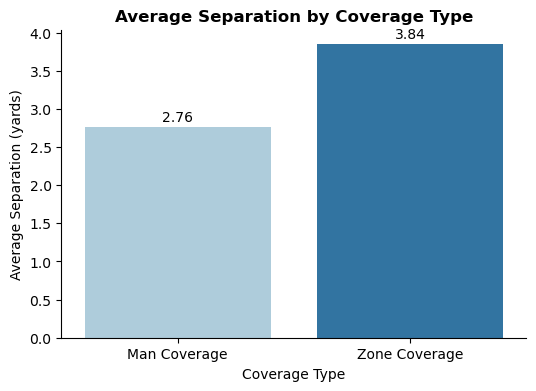

In [43]:
# --- 1. Average separation by coverage type ---
avg_sep_by_cov = (
    receiver_defender_pairs
    .groupby("team_coverage_man_zone")["dist_to_receiver"]
    .mean()
    .reset_index()
)

avg_sep_by_cov["team_coverage_man_zone"] = avg_sep_by_cov["team_coverage_man_zone"].replace({
    "MAN_COVERAGE": "Man Coverage",
    "ZONE_COVERAGE": "Zone Coverage"
})

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=avg_sep_by_cov, x="team_coverage_man_zone", y="dist_to_receiver", palette='Paired')
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=2)
plt.title("Average Separation by Coverage Type", fontsize=12, fontweight='bold')
plt.xlabel("Coverage Type")
plt.ylabel("Average Separation (yards)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine(top=True, right=True)
plt.grid(False)
plt.show()

/var/folders/wl/mr0t_6yx7bd85zhwy66s84hh0000gn/T/ipykernel_41239/882874570.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_sep_by_pass, x="pass_result", y="dist_to_receiver", palette='Paired')


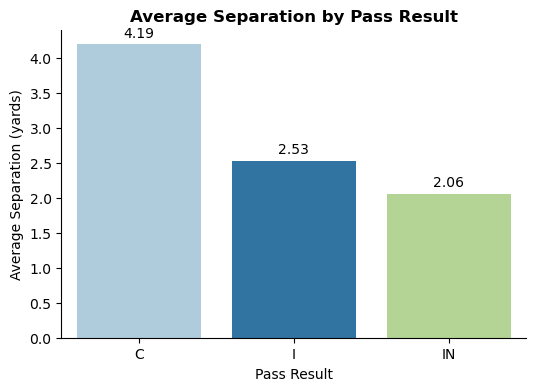

In [44]:
# --- 2. Average separation by pass result ---
avg_sep_by_pass = (
    receiver_defender_pairs
    .groupby("pass_result")["dist_to_receiver"]
    .mean()
    .reset_index()
    .sort_values("dist_to_receiver", ascending=False)
)

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=avg_sep_by_pass, x="pass_result", y="dist_to_receiver", palette='Paired')
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10, padding=3)
plt.title("Average Separation by Pass Result", fontsize=12, weight='bold')
plt.xlabel("Pass Result")
plt.ylabel("Average Separation (yards)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine(top=True, right=True)
plt.grid(False)
plt.show()

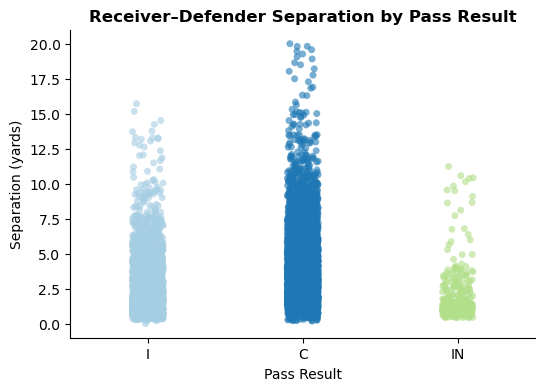

In [45]:
# --- 3. Jittered scatter (distribution of separations by pass result) ---
plt.figure(figsize=(6, 4))
sns.stripplot(
    data=receiver_defender_pairs,
    x="pass_result", y="dist_to_receiver",
    hue="pass_result", jitter=True, alpha=0.6,
    palette='Paired'
)
plt.title("Receiver–Defender Separation by Pass Result", fontsize=12, fontweight='bold')
plt.xlabel("Pass Result")
plt.ylabel("Separation (yards)")  
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine(top=True, right=True)
plt.grid(False)
plt.show()

## Phase III Additions

In [55]:
# Recreate distance and within_1_yard columns safely
receiver_defender_pairs["distance"] = np.hypot(
    receiver_defender_pairs["rec_x"] - receiver_defender_pairs["def_x"],
    receiver_defender_pairs["rec_y"] - receiver_defender_pairs["def_y"],
)

receiver_defender_pairs["within_1_yard"] = receiver_defender_pairs["distance"] <= 1.0

receiver_defender_pairs[["rec_x", "rec_y", "def_x", "def_y", "distance", "within_1_yard"]].head()


,rec_x,rec_y,def_x,def_y,distance,within_1_yard
0,53.20,13.98,56.22,17.28,4.473299,False
1,53.96,13.78,56.63,16.88,4.091320,False
2,54.70,13.54,57.06,16.46,3.754464,False
3,55.41,13.27,57.48,16.02,3.442005,False
4,56.09,12.95,57.91,15.56,3.181902,False


In [57]:
FRAME_RATE = 10
SECONDS_PER_FRAME = 1 / FRAME_RATE

time_within_1_yard_per_play = (
    receiver_defender_pairs
    .groupby(["game_id", "play_id", "def_nfl_id"], as_index=False)
    .agg(
        frames_within_1_yard=("within_1_yard", "sum"),
        total_frames=("within_1_yard", "size"),
    )
    .assign(
        pct_time_within_1_yard=lambda df: df["frames_within_1_yard"] / df["total_frames"],
        seconds_within_1_yard=lambda df: df["frames_within_1_yard"] * SECONDS_PER_FRAME,
    )
)

time_within_1_yard_per_play.head()

,game_id,play_id,def_nfl_id,frames_within_1_yard,total_frames,pct_time_within_1_yard,seconds_within_1_yard
0,2023090700,101,46137.0,0,21,0.0,0.0
1,2023090700,194,54653.0,0,9,0.0,0.0
2,2023090700,219,53953.0,0,8,0.0,0.0
3,2023090700,361,46137.0,0,16,0.0,0.0
4,2023090700,436,46137.0,0,7,0.0,0.0


In [59]:
receiver_defender_pairs["within_1_yard"].value_counts(dropna=False)


within_1_yard
False    8024
True     1036
Name: count, dtype: int64

In [60]:
receiver_defender_pairs["within_1_yard"].mean()


np.float64(0.11434878587196468)

In [61]:
pass_results = pass_info[["game_id", "play_id", "pass_result"]].drop_duplicates()

time_within_1_yard_per_play = time_within_1_yard_per_play.merge(
    pass_results,
    on=["game_id", "play_id"],
    how="left",
)


In [62]:
receiver_defender_pairs.loc[
    receiver_defender_pairs["within_1_yard"], 
    ["def_nfl_id", "distance"]
].head(20)


,def_nfl_id,distance
88,44888.0,0.932309
89,44888.0,0.776981
90,44888.0,0.671193
91,44888.0,0.528015
92,44888.0,0.399249
93,44888.0,0.493356
170,54562.0,0.676831
171,54562.0,0.721110
172,54562.0,0.754255
173,54562.0,0.791202


In [63]:
receiver_defender_pairs.loc[
    receiver_defender_pairs["distance"] <= 1.0,
    ["def_nfl_id", "distance", "within_1_yard"]
].head(20)


,def_nfl_id,distance,within_1_yard
88,44888.0,0.932309,True
89,44888.0,0.776981,True
90,44888.0,0.671193,True
91,44888.0,0.528015,True
92,44888.0,0.399249,True
93,44888.0,0.493356,True
170,54562.0,0.676831,True
171,54562.0,0.721110,True
172,54562.0,0.754255,True
173,54562.0,0.791202,True


In [64]:
FRAME_RATE = 10
SECONDS_PER_FRAME = 1 / FRAME_RATE

time_within_1_yard_per_play = (
    receiver_defender_pairs
    .groupby(["game_id", "play_id", "def_nfl_id"], as_index=False)
    .agg(
        frames_within_1_yard=("within_1_yard", "sum"),
        total_frames=("within_1_yard", "size"),
    )
    .assign(
        pct_time_within_1_yard=lambda df: df["frames_within_1_yard"] / df["total_frames"],
        seconds_within_1_yard=lambda df: df["frames_within_1_yard"] * SECONDS_PER_FRAME,
    )
)

In [65]:
time_within_1_yard_per_play["frames_within_1_yard"].describe()
time_within_1_yard_per_play["frames_within_1_yard"].max()
time_within_1_yard_per_play["frames_within_1_yard"].sum()


np.int64(1036)

In [66]:
time_within_1_yard_per_play.sort_values(
    "frames_within_1_yard", ascending=False
).head(10)


,game_id,play_id,def_nfl_id,frames_within_1_yard,total_frames,pct_time_within_1_yard,seconds_within_1_yard
640,2023091010,3064,46775.0,23,23,1.000000,2.3
883,2023091100,3167,54650.0,20,33,0.606061,2.0
189,2023091002,3812,54533.0,17,21,0.809524,1.7
350,2023091005,2440,46168.0,17,26,0.653846,1.7
572,2023091009,2430,53438.0,17,21,0.809524,1.7
399,2023091006,1143,37078.0,16,19,0.842105,1.6
743,2023091012,327,54677.0,16,16,1.000000,1.6
57,2023090700,4041,44906.0,15,19,0.789474,1.5
689,2023091011,1839,54808.0,15,15,1.000000,1.5
806,2023091013,1072,52444.0,15,15,1.000000,1.5


In [67]:
pass_results = pass_info[["game_id", "play_id", "pass_result"]].drop_duplicates()

time_within_1_yard_per_play = time_within_1_yard_per_play.merge(
    pass_results,
    on=["game_id", "play_id"],
    how="left",
)

In [68]:
time_within_summary = (
    time_within_1_yard_per_play
    .groupby("pass_result")
    .agg(
        avg_pct_time_within_1_yard=("pct_time_within_1_yard", "mean"),
        std_pct_time_within_1_yard=("pct_time_within_1_yard", "std"),
        avg_seconds_within_1_yard=("seconds_within_1_yard", "mean"),
        std_seconds_within_1_yard=("seconds_within_1_yard", "std"),
    )
    .reset_index()
)

time_within_summary

,pass_result,avg_pct_time_within_1_yard,std_pct_time_within_1_yard,avg_seconds_within_1_yard,std_seconds_within_1_yard
0,C,0.034130,0.139396,0.041764,0.192448
1,I,0.196492,0.299305,0.260755,0.404763
2,IN,0.249661,0.336428,0.335714,0.568438


In [69]:
time_within_1_yard_per_play.sort_values(
    "frames_within_1_yard", ascending=False
).head(5)

,game_id,play_id,def_nfl_id,frames_within_1_yard,total_frames,pct_time_within_1_yard,seconds_within_1_yard,pass_result
640,2023091010,3064,46775.0,23,23,1.000000,2.3,IN
883,2023091100,3167,54650.0,20,33,0.606061,2.0,C
189,2023091002,3812,54533.0,17,21,0.809524,1.7,I
350,2023091005,2440,46168.0,17,26,0.653846,1.7,IN
572,2023091009,2430,53438.0,17,21,0.809524,1.7,I


/var/folders/wl/mr0t_6yx7bd85zhwy66s84hh0000gn/T/ipykernel_41239/3953137086.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


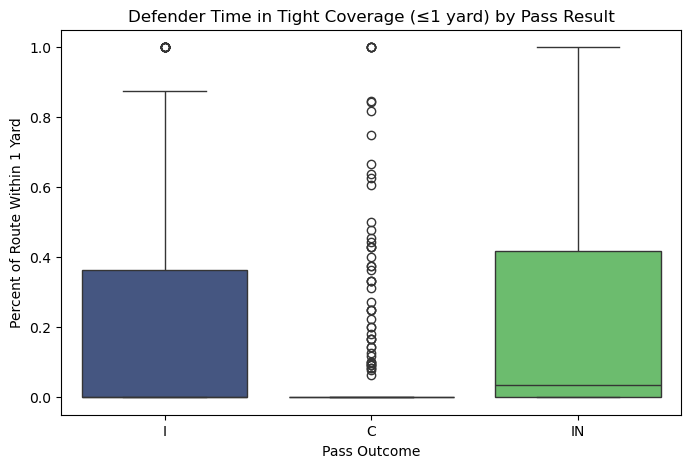

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(
    data=time_within_1_yard_per_play,
    x="pass_result",
    y="pct_time_within_1_yard",
    palette="viridis"
)

plt.title("Defender Time in Tight Coverage (≤1 yard) by Pass Result")
plt.xlabel("Pass Outcome")
plt.ylabel("Percent of Route Within 1 Yard")
plt.show()

/var/folders/wl/mr0t_6yx7bd85zhwy66s84hh0000gn/T/ipykernel_41239/2408638032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


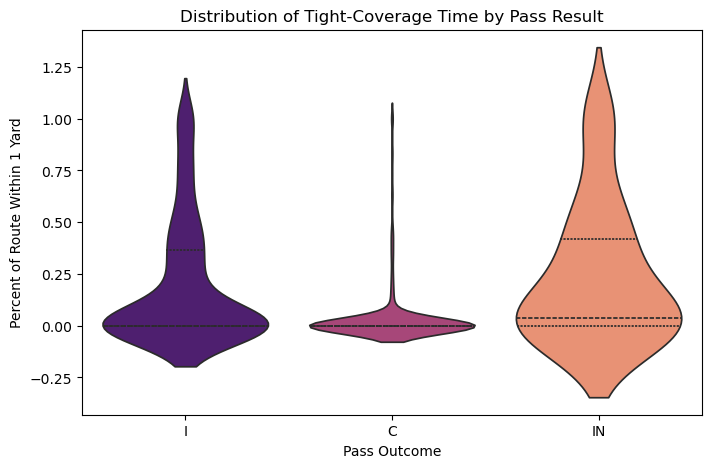

In [71]:
plt.figure(figsize=(8,5))
sns.violinplot(
    data=time_within_1_yard_per_play,
    x="pass_result",
    y="pct_time_within_1_yard",
    inner="quartile",
    palette="magma"
)

plt.title("Distribution of Tight-Coverage Time by Pass Result")
plt.xlabel("Pass Outcome")
plt.ylabel("Percent of Route Within 1 Yard")
plt.show()

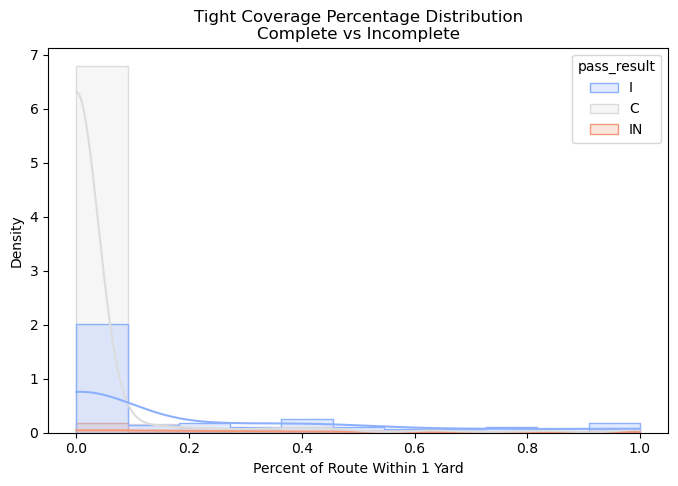

In [72]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=time_within_1_yard_per_play,
    x="pct_time_within_1_yard",
    hue="pass_result",
    kde=True,
    palette="coolwarm",
    element="step",
    stat="density"
)

plt.title("Tight Coverage Percentage Distribution\nComplete vs Incomplete")
plt.xlabel("Percent of Route Within 1 Yard")
plt.ylabel("Density")
plt.show()


In [73]:
# Pick the defender/play with the most frames within 1 yard
top_play = (
    time_within_1_yard_per_play
    .sort_values("frames_within_1_yard", ascending=False)
    .iloc[0]
)

g_id = top_play["game_id"]
p_id = top_play["play_id"]
d_id = top_play["def_nfl_id"]

g_id, p_id, d_id


(np.int64(2023091010), np.int64(3064), np.float64(46775.0))

In [74]:
pair_traj = (
    receiver_defender_pairs
    .query("game_id == @g_id and play_id == @p_id and def_nfl_id == @d_id")
    .sort_values("frame_id")
    .reset_index(drop=True)
)

pair_traj[["frame_id", "rec_x", "rec_y", "def_x", "def_y", "distance"]].head()


,frame_id,rec_x,rec_y,def_x,def_y,distance
0,1,23.24,15.45,23.66,14.64,0.912414
1,2,22.47,15.31,22.91,14.49,0.930591
2,3,21.70,15.13,22.16,14.30,0.948947
3,4,20.92,14.91,21.40,14.07,0.967471
4,5,20.16,14.66,20.64,13.82,0.967471


In [93]:
# Take the first row for metadata (same for whole play)
meta = pair_traj.iloc[0]

receiver_name = meta["receiver_name"]
defender_name = meta["defender_name"]

home = meta["home_team_abbr"]
away = meta["visitor_team_abbr"]
matchup = f"{away} @ {home}"

play_result = meta["pass_result"]  # e.g., "COMPLETE" / "INCOMPLETE"

In [94]:
matchup, defender_name, receiver_name, play_result


('MIA @ LAC', 'J.C. Jackson', 'Braxton Berrios', 'IN')

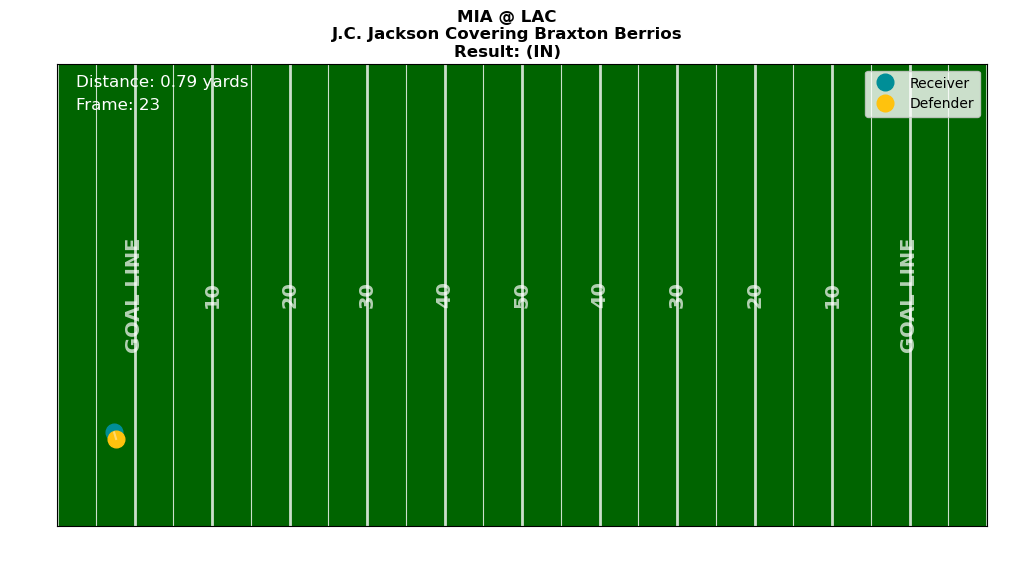

In [98]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# === COLORS ===
FIELD_GREEN = "#006400"          # dark green
LINE_WHITE = "white"
RECEIVER_COLOR = "#008E97"       # gold
DEFENDER_COLOR = "#FFC20E"       # deep sky blue

fig, ax = plt.subplots(figsize=(12, 6))

fig.suptitle(
    f"{matchup}\n{defender_name} Covering {receiver_name}\nResult: ({play_result})",
    fontsize=12,
    fontweight="bold",
    color="black",
    y=0.97  # move it a bit down from the very top
)

plt.subplots_adjust(top=0.88)

# --- Draw the green field background ---
ax.set_facecolor(FIELD_GREEN)

# Field boundaries (0–120 x, 0–53.3 y)
xmin, xmax = 0, 120
ymin, ymax = 0, 53.3
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# --- Yard lines every 5 yards ---
for x in range(0, 121, 5):
    lw = 2 if x % 10 == 0 else 0.8
    ax.plot([x, x], [0, 53.3], color=LINE_WHITE, linewidth=lw, alpha=0.8)

# --- Yard numbers every 10 yards ---
yard_numbers = {10:"GOAL LINE", 20:"10", 30:"20", 40:"30", 50:"40", 60:"50",
                70:"40", 80:"30", 90:"20", 100:"10", 110:"GOAL LINE"}

    

for x, num in yard_numbers.items():
    ax.text(x, 53.3/2, num,
            color=LINE_WHITE, fontsize=14, fontweight="bold",
            ha="center", va="center", alpha=0.7, rotation=90)

ax.set_xlabel("Field X (yards)", color="white")
ax.set_ylabel("Field Y (yards)", color="white")
ax.tick_params(colors="white")

# --- Plot objects (with NFL colors) ---
(rec_point,) = ax.plot([], [], "o", markersize=12, color=RECEIVER_COLOR, label="Receiver")
(def_point,) = ax.plot([], [], "o", markersize=12, color=DEFENDER_COLOR, label="Defender")
(line_between,) = ax.plot([], [], "-", color="white", alpha=0.4)

dist_text = ax.text(0.02, 0.95, "", transform=ax.transAxes, color="white", fontsize=12)
frame_text = ax.text(0.02, 0.90, "", transform=ax.transAxes, color="white", fontsize=12)

ax.legend(loc="upper right", facecolor="white")

# --- INIT + UPDATE (same as before, no changes needed except colors) ---
def init():
    rec_point.set_data([], [])
    def_point.set_data([], [])
    line_between.set_data([], [])
    dist_text.set_text("")
    frame_text.set_text("")
    return rec_point, def_point, line_between, dist_text, frame_text

def update(i):
    row = pair_traj.iloc[i]
    rx, ry = row["rec_x"], row["rec_y"]
    dx, dy = row["def_x"], row["def_y"]

    rec_point.set_data([rx], [ry])
    def_point.set_data([dx], [dy])
    line_between.set_data([rx, dx], [ry, dy])

    dist_text.set_text(f"Distance: {row['distance']:.2f} yards")
    frame_text.set_text(f"Frame: {int(row['frame_id'])}")

    return rec_point, def_point, line_between, dist_text, frame_text

anim = FuncAnimation(
    fig, update, frames=len(pair_traj),
    init_func=init, interval=100, blit=True
)

HTML(anim.to_jshtml())
